# Emotion Recognition in Speech - Data Wrangling

## Contents

* [Introduction](#Introduction)
    * [Recap Of Data Science Problem](#Recap_Of_Data_Science_Problem)
* [Imports](#Imports)
* [Objectives](#Objectives)
* [About the dataset](#About_the_dataset)
    * [Loading and Visualizing an Audio File](#Loading_and_Visualizing_an_Audio_File)
    * [Audio File information](#Audio_File_information)
    * [Playing a sample](#Playing_a_sample)
* [Vizualizing](#Vizualizing)
    * [Visualizing the Audio File](#Visualizing_the_Audio_File)
    * [Spectrogram](#Spectrogram)
    * [Display in log-frequency](#Display_in_log-frequency)
    * [Normalization](#Normalization)
    * [Down Sampling Test](#Down_Sampling_Test)
    * [MFCC, Chroma, Mel Test](#MFCC,_Chroma,_Mel_Test)
* [Creating a dataframe](#Creating_a_dataframe)
* [Exploring the dataframe](#Exploring_the_dataframe)
    * [Strong vs normal emotion](#Strong_vs_normal_emotion)    
    * [Number of repeated phrases](#Number_of_repeated_phrases)   
    * [Number of Male vs Female actors](#Number_of_Male_vs_Female_actors)    
    * [Distributions Of Feature Values](#Distributions_Of_Feature_Values)
    * [Numeric data summary](#Numeric_data_summary)
* [Exporting DataFrame](#Exporting_DataFrame)
* [Summary](#Summary)

## Introduction

This step focuses on collecting data, organizing it, and making sure it's well defined. 
Attention to these tasks will pay off greatly later on. Some data cleaning can be done at this stage, 
but it's important not to be overzealous in your cleaning before we've explored the data to better understand it.

### Recap Of Data Science Problem<a id='Recap_Of_Data_Science_Problem'></a>

The purpose of this data science project is to come up with a predictive model for emotion recognition in speech. 
We suspects it may have better responses to human / robot interaction based on categories of emotion detect 
from customers with audio-enabled bots. The categorization of the customer's emotial state can better atune a variety 
of optional responses to customize interations. This project aims to build a predictive model for emotion recognition 
based on a set of actor data that falls into 8 categories of emotional state. This model will be used to provide 
guidance for an audio-enabled bot's available responses and future customer interaction.

## Imports

In [1]:
# Importing librosa, soundfile, os, glob, pickle, numpy in the lines below
import librosa
import librosa.display
import soundfile
import pandas as pd
import os, glob, pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

from dotenv import load_dotenv, find_dotenv

import warnings

# Suppress specific FutureWarnings related to seaborn and pandas
warnings.filterwarnings('ignore', category=FutureWarning, module='seaborn')
warnings.filterwarnings('ignore', category=FutureWarning, module='pandas')

load_dotenv()
sound_path = os.getenv('audio_path')

## Objectives

There are some fundamental questions to resolve in this notebook.

•Do we may have the data we need to tackle the desired question?  
      •Have we identified the required target value?   
      •Do we have potentially useful features?   
•Do we have any fundamental issues with the data?  

## About the dataset<a id='About_the_dataset'></a>

This dataset is pulled from the Ryerson Audio-Visual Database of Emotional Speech and Song (RAVDESS). It has 
classifications that are contained in the file names. They are as follows:

Filename identifiers

Modality (01 = full-AV, 02 = video-only, 03 = audio-only).

Vocal channel (01 = speech, 02 = song).

Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised).

Emotional intensity (01 = normal, 02 = strong). NOTE: There is no strong intensity for the 'neutral' emotion.

Statement (01 = "Kids are talking by the door", 02 = "Dogs are sitting by the door").

Repetition (01 = 1st repetition, 02 = 2nd repetition).

Actor (01 to 24. Odd numbered actors are male, even numbered actors are female).

Filename example: 03-01-06-01-02-01-12.wav

Audio-only (03)
Speech (01)
Fearful (06)
Normal intensity (01)
Statement "dogs" (02)
1st Repetition (01)
12th Actor (12)
Female, as the actor ID number is even.

Academic citation

If you use the RAVDESS in an academic publication, please use the following citation: Livingstone SR, Russo FA (2018) 
    The Ryerson Audio-Visual Database of Emotional Speech and Song (RAVDESS): A dynamic, multimodal set of facial and 
        vocal expressions in North American English. PLoS ONE 13(5): e0196391. https://doi.org/10.1371/journal.pone.0196391.

All other attributions

If you use the RAVDESS in a form other than an academic publication, such as in a blog post, school project, or 
non-commercial product, please use the following attribution: "The Ryerson Audio-Visual Database of Emotional Speech 
    and Song (RAVDESS)" by Livingstone & Russo is licensed under CC BY-NA-SC 4.0.

### Loading and Visualizing an Audio File<a id='Loading_and_Visualizing_an_Audio_File'></a>

In [2]:
# path of the audio file
audio_data = f'{sound_path}/ravdess-data/Actor_01/03-01-01-01-01-01-01.wav'
# This returns an audio time series as a numpy array with a default sampling rate(sr) of 22KHZ
x, sr = librosa.load(audio_data, sr=None)

# We can change this behavior by resampling at sr=44.1KHz.
# x = librosa.load(audio_data, sr=44000)

### Audio File information<a id='Audio_File_information'></a>

In [3]:
print(x.shape)
print(sr)

(52853,)
16000


### Playing a sample<a id='Playing_a_sample'></a>

In [4]:
import IPython.display as ipd
ipd.Audio(f'{sound_path}/ravdess-data/Actor_01/03-01-01-01-01-01-01.wav') # load a local WAV file

## Vizualizing

### Visualizing the Audio File<a id='Visualizing_the_Audio_File'></a>

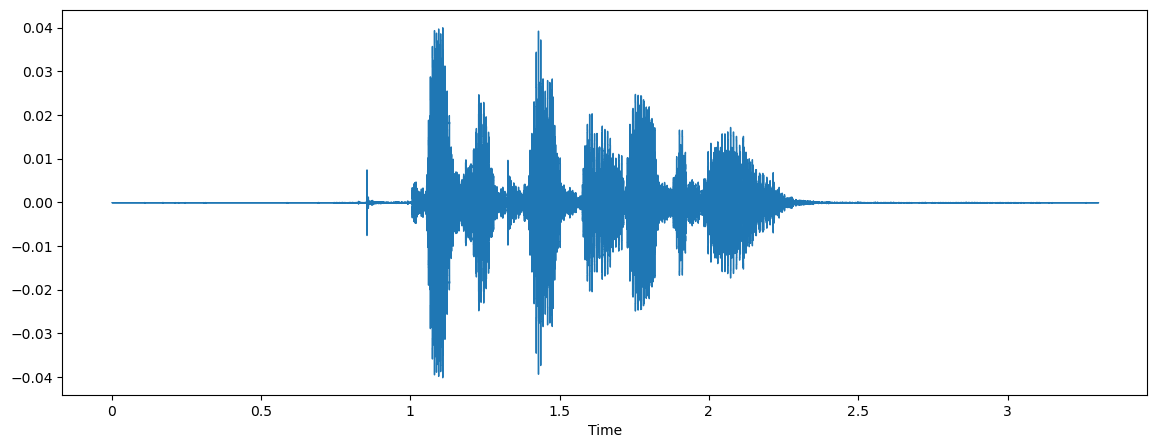

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display

plt.figure(figsize=(14, 5))
# plotting the sampled signal
librosa.display.waveshow(x, sr=sr)

### Spectrogram

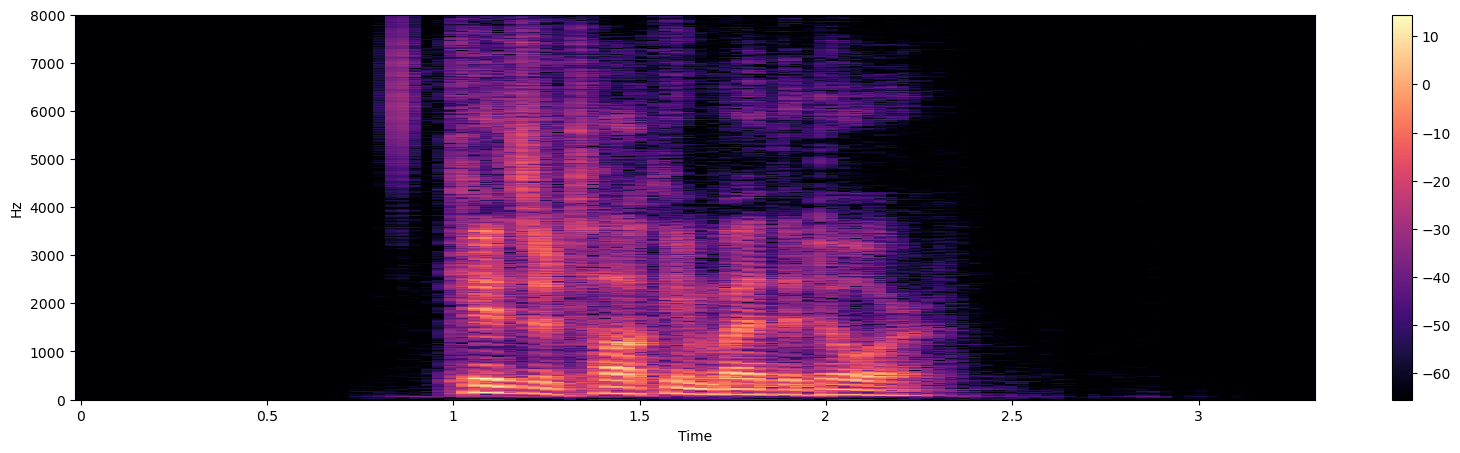

In [6]:
# x: numpy array
X = librosa.stft(x)
# converting into energy levels(dB)
Xdb = librosa.amplitude_to_db(abs(X))

plt.figure(figsize=(20, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

### Display in log-frequency<a id='Display_in_log-frequency'></a>

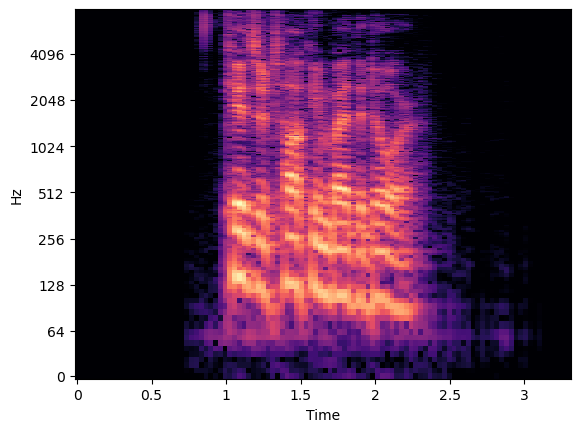

In [7]:
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')

### Normalization

In [8]:
# looks like librosa load function automatically normalizes so we're good there

### Down Sampling Test<a id='Down_Sampling_Test'></a>

In [9]:
# If you need to downsample the audio
desired_sr = 10000  # For example, to downsample to 1 kHz
x_downsampled = librosa.resample(x, orig_sr=sr, target_sr=desired_sr)

In [10]:
ipd.Audio(x_downsampled, rate=desired_sr) # play downsampled file

### MFCC, Chroma, Mel Test<a id='MFCC,_Chroma,_Mel_Test'></a>

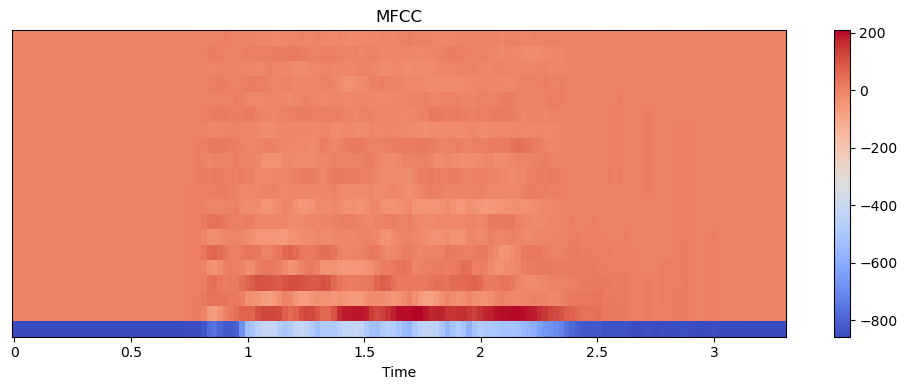

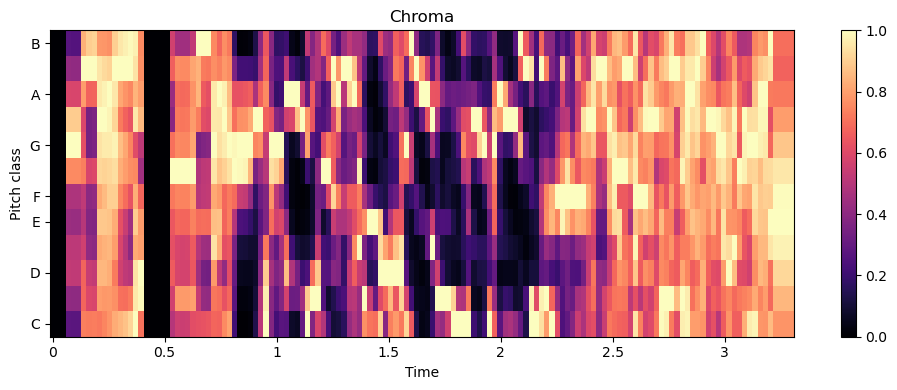

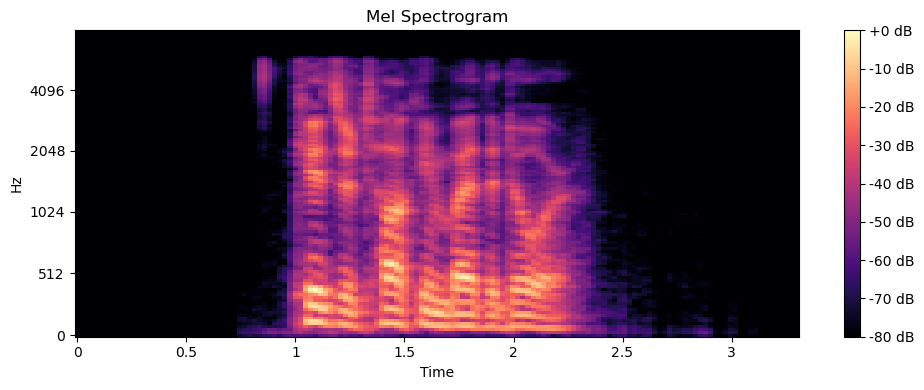

In [11]:
# Load the audio file
audio_path = f'{sound_path}/ravdess-data/Actor_01/03-01-01-01-01-01-01.wav'
y, sr = librosa.load(audio_path)

# Extract MFCC
mfcc = librosa.feature.mfcc(y=y, sr=sr)
# Display MFCC
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfcc, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()
plt.show()

# Extract Chroma
chroma = librosa.feature.chroma_stft(y=y, sr=sr)
# Display Chroma
plt.figure(figsize=(10, 4))
librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('Chroma')
plt.tight_layout()
plt.show()

# Extract Mel Spectrogram
mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr)
# Display Mel Spectrogram
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(mel_spectrogram, ref=np.max),
                         y_axis='mel', fmax=8000, x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram')
plt.tight_layout()
plt.show()

## Creating a dataframe<a id='Creating_a_dataframe'></a>

In [12]:
# Define the determine_intensity function
def determine_intensity(filename):
    try:
        number = int(filename.split('-')[3].rstrip('.wav'))
        return 1 if number % 2 == 1 else 2
    except Exception as e:
        print(f"Error in determine_intensity: {e}")
        return 'Unknown'
    
# Define the determine_repetition function
def determine_repetition(filename):
    try:
        number = int(filename.split('-')[5].rstrip('.wav'))
        return 1 if number % 2 == 1 else 2
    except Exception as e:
        print(f"Error in determine_repetition: {e}")
        return 'Unknown'
    
# Define the determine_gender function
def determine_gender(filename):
    try:
        number = int(filename.split('-')[6].rstrip('.wav'))
        return 1 if number % 2 == 1 else 2
    except Exception as e:
        print(f"Error in determine_gender: {e}")
        return 'Unknown'

# Assuming sound_path is already defined
file_pattern = f'{sound_path}/ravdess-data/Actor_*/*.wav'

# Empty list to collect feature data
data = []

# For loop to iterate over files
for file_path in glob.glob(file_pattern):
    try:
        # Extract just the .wav file name
        filename = os.path.basename(file_path)
        # print(f"Processing file: {filename}")  # decided not to print the processing part

        # Load each individual file
        y, sr = librosa.load(file_path, sr=None)

        # Extract features
        mfcc = librosa.feature.mfcc(y=y, sr=sr)
        chroma = librosa.feature.chroma_stft(y=y, sr=sr)
        mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr)

        # Store the mean, max, min, and median of each feature and the gender in the DataFrame
        features = {
            'filename': filename,
            'voice_intensity': determine_intensity(filename),
            'statement_repetition': determine_repetition(filename),
            'actor_gender': determine_gender(filename),
            'mfcc_mean': mfcc.mean(),
            'mfcc_max': mfcc.max(),
            'mfcc_min': mfcc.min(),
            'mfcc_median': np.median(mfcc),  # Calculate and add median
            'chroma_mean': chroma.mean(),
            'chroma_max': chroma.max(),
            'chroma_min': chroma.min(),
            'chroma_median': np.median(chroma),  # Calculate and add median
            'mel_mean': mel_spectrogram.mean(),
            'mel_max': mel_spectrogram.max(),
            'mel_min': mel_spectrogram.min(),
            'mel_median': np.median(mel_spectrogram)  # Calculate and add median
        }

        data.append(features)
    except Exception as e:
        print(f"Error processing file {file_path}: {e}")

# Create a DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
print(df.head())


Processing file: 03-01-01-01-01-01-01.wav
Processing file: 03-01-01-01-01-02-01.wav
Processing file: 03-01-01-01-02-01-01.wav
Processing file: 03-01-01-01-02-02-01.wav
Processing file: 03-01-02-01-01-01-01.wav
Processing file: 03-01-02-01-01-02-01.wav
Processing file: 03-01-02-01-02-01-01.wav
Processing file: 03-01-02-01-02-02-01.wav
Processing file: 03-01-02-02-01-01-01.wav
Processing file: 03-01-02-02-01-02-01.wav
Processing file: 03-01-02-02-02-01-01.wav
Processing file: 03-01-02-02-02-02-01.wav
Processing file: 03-01-03-01-01-01-01.wav
Processing file: 03-01-03-01-01-02-01.wav
Processing file: 03-01-03-01-02-01-01.wav
Processing file: 03-01-03-01-02-02-01.wav
Processing file: 03-01-03-02-01-01-01.wav
Processing file: 03-01-03-02-01-02-01.wav
Processing file: 03-01-03-02-02-01-01.wav
Processing file: 03-01-03-02-02-02-01.wav
Processing file: 03-01-04-01-01-01-01.wav
Processing file: 03-01-04-01-01-02-01.wav
Processing file: 03-01-04-01-02-01-01.wav
Processing file: 03-01-04-01-02-02

Processing file: 03-01-04-01-01-01-04.wav
Processing file: 03-01-04-01-01-02-04.wav
Processing file: 03-01-04-01-02-01-04.wav
Processing file: 03-01-04-01-02-02-04.wav
Processing file: 03-01-04-02-01-01-04.wav
Processing file: 03-01-04-02-01-02-04.wav
Processing file: 03-01-04-02-02-01-04.wav
Processing file: 03-01-04-02-02-02-04.wav
Processing file: 03-01-05-01-01-01-04.wav
Processing file: 03-01-05-01-01-02-04.wav
Processing file: 03-01-05-01-02-01-04.wav
Processing file: 03-01-05-01-02-02-04.wav
Processing file: 03-01-05-02-01-01-04.wav
Processing file: 03-01-05-02-01-02-04.wav
Processing file: 03-01-05-02-02-01-04.wav
Processing file: 03-01-05-02-02-02-04.wav
Processing file: 03-01-06-01-01-01-04.wav
Processing file: 03-01-06-01-01-02-04.wav
Processing file: 03-01-06-01-02-01-04.wav
Processing file: 03-01-06-01-02-02-04.wav
Processing file: 03-01-06-02-01-01-04.wav
Processing file: 03-01-06-02-01-02-04.wav
Processing file: 03-01-06-02-02-01-04.wav
Processing file: 03-01-06-02-02-02

Processing file: 03-01-06-01-01-01-07.wav
Processing file: 03-01-06-01-01-02-07.wav
Processing file: 03-01-06-01-02-01-07.wav
Processing file: 03-01-06-01-02-02-07.wav
Processing file: 03-01-06-02-01-01-07.wav
Processing file: 03-01-06-02-01-02-07.wav
Processing file: 03-01-06-02-02-01-07.wav
Processing file: 03-01-06-02-02-02-07.wav
Processing file: 03-01-07-01-01-01-07.wav
Processing file: 03-01-07-01-01-02-07.wav
Processing file: 03-01-07-01-02-01-07.wav
Processing file: 03-01-07-01-02-02-07.wav
Processing file: 03-01-07-02-01-01-07.wav
Processing file: 03-01-07-02-01-02-07.wav
Processing file: 03-01-07-02-02-01-07.wav
Processing file: 03-01-07-02-02-02-07.wav
Processing file: 03-01-08-01-01-01-07.wav
Processing file: 03-01-08-01-01-02-07.wav
Processing file: 03-01-08-01-02-01-07.wav
Processing file: 03-01-08-01-02-02-07.wav
Processing file: 03-01-08-02-01-01-07.wav
Processing file: 03-01-08-02-01-02-07.wav
Processing file: 03-01-08-02-02-01-07.wav
Processing file: 03-01-08-02-02-02

Processing file: 03-01-08-02-01-01-10.wav
Processing file: 03-01-08-02-01-02-10.wav
Processing file: 03-01-08-02-02-01-10.wav
Processing file: 03-01-08-02-02-02-10.wav
Processing file: 03-01-01-01-01-01-11.wav
Processing file: 03-01-01-01-01-02-11.wav
Processing file: 03-01-01-01-02-01-11.wav
Processing file: 03-01-01-01-02-02-11.wav
Processing file: 03-01-02-01-01-01-11.wav
Processing file: 03-01-02-01-01-02-11.wav
Processing file: 03-01-02-01-02-01-11.wav
Processing file: 03-01-02-01-02-02-11.wav
Processing file: 03-01-02-02-01-01-11.wav
Processing file: 03-01-02-02-01-02-11.wav
Processing file: 03-01-02-02-02-01-11.wav
Processing file: 03-01-02-02-02-02-11.wav
Processing file: 03-01-03-01-01-01-11.wav
Processing file: 03-01-03-01-01-02-11.wav
Processing file: 03-01-03-01-02-01-11.wav
Processing file: 03-01-03-01-02-02-11.wav
Processing file: 03-01-03-02-01-01-11.wav
Processing file: 03-01-03-02-01-02-11.wav
Processing file: 03-01-03-02-02-01-11.wav
Processing file: 03-01-03-02-02-02

Processing file: 03-01-04-01-01-01-14.wav
Processing file: 03-01-04-01-01-02-14.wav
Processing file: 03-01-04-01-02-01-14.wav
Processing file: 03-01-04-01-02-02-14.wav
Processing file: 03-01-04-02-01-01-14.wav
Processing file: 03-01-04-02-01-02-14.wav
Processing file: 03-01-04-02-02-01-14.wav
Processing file: 03-01-04-02-02-02-14.wav
Processing file: 03-01-05-01-01-01-14.wav
Processing file: 03-01-05-01-01-02-14.wav
Processing file: 03-01-05-01-02-01-14.wav
Processing file: 03-01-05-01-02-02-14.wav
Processing file: 03-01-05-02-01-01-14.wav
Processing file: 03-01-05-02-01-02-14.wav
Processing file: 03-01-05-02-02-01-14.wav
Processing file: 03-01-05-02-02-02-14.wav
Processing file: 03-01-06-01-01-01-14.wav
Processing file: 03-01-06-01-01-02-14.wav
Processing file: 03-01-06-01-02-01-14.wav
Processing file: 03-01-06-01-02-02-14.wav
Processing file: 03-01-06-02-01-01-14.wav
Processing file: 03-01-06-02-01-02-14.wav
Processing file: 03-01-06-02-02-01-14.wav
Processing file: 03-01-06-02-02-02

Processing file: 03-01-08-01-01-01-17.wav
Processing file: 03-01-08-01-01-02-17.wav
Processing file: 03-01-08-01-02-01-17.wav
Processing file: 03-01-08-01-02-02-17.wav
Processing file: 03-01-08-02-01-01-17.wav
Processing file: 03-01-08-02-01-02-17.wav
Processing file: 03-01-08-02-02-01-17.wav
Processing file: 03-01-08-02-02-02-17.wav
Processing file: 03-01-01-01-01-01-18.wav
Processing file: 03-01-01-01-01-02-18.wav
Processing file: 03-01-01-01-02-01-18.wav
Processing file: 03-01-01-01-02-02-18.wav
Processing file: 03-01-02-01-01-01-18.wav
Processing file: 03-01-02-01-01-02-18.wav
Processing file: 03-01-02-01-02-01-18.wav
Processing file: 03-01-02-01-02-02-18.wav
Processing file: 03-01-02-02-01-01-18.wav
Processing file: 03-01-02-02-01-02-18.wav
Processing file: 03-01-02-02-02-01-18.wav
Processing file: 03-01-02-02-02-02-18.wav
Processing file: 03-01-03-01-01-01-18.wav
Processing file: 03-01-03-01-01-02-18.wav
Processing file: 03-01-03-01-02-01-18.wav
Processing file: 03-01-03-01-02-02

Processing file: 03-01-04-01-02-01-21.wav
Processing file: 03-01-04-01-02-02-21.wav
Processing file: 03-01-04-02-01-01-21.wav
Processing file: 03-01-04-02-01-02-21.wav
Processing file: 03-01-04-02-02-01-21.wav
Processing file: 03-01-04-02-02-02-21.wav
Processing file: 03-01-05-01-01-01-21.wav
Processing file: 03-01-05-01-01-02-21.wav
Processing file: 03-01-05-01-02-01-21.wav
Processing file: 03-01-05-01-02-02-21.wav
Processing file: 03-01-05-02-01-01-21.wav
Processing file: 03-01-05-02-01-02-21.wav
Processing file: 03-01-05-02-02-01-21.wav
Processing file: 03-01-05-02-02-02-21.wav
Processing file: 03-01-06-01-01-01-21.wav
Processing file: 03-01-06-01-01-02-21.wav
Processing file: 03-01-06-01-02-01-21.wav
Processing file: 03-01-06-01-02-02-21.wav
Processing file: 03-01-06-02-01-01-21.wav
Processing file: 03-01-06-02-01-02-21.wav
Processing file: 03-01-06-02-02-01-21.wav
Processing file: 03-01-06-02-02-02-21.wav
Processing file: 03-01-07-01-01-01-21.wav
Processing file: 03-01-07-01-01-02

Processing file: 03-01-07-01-02-02-24.wav
Processing file: 03-01-07-02-01-01-24.wav
Processing file: 03-01-07-02-01-02-24.wav
Processing file: 03-01-07-02-02-01-24.wav
Processing file: 03-01-07-02-02-02-24.wav
Processing file: 03-01-08-01-01-01-24.wav
Processing file: 03-01-08-01-01-02-24.wav
Processing file: 03-01-08-01-02-01-24.wav
Processing file: 03-01-08-01-02-02-24.wav
Processing file: 03-01-08-02-01-01-24.wav
Processing file: 03-01-08-02-01-02-24.wav
Processing file: 03-01-08-02-02-01-24.wav
Processing file: 03-01-08-02-02-02-24.wav
                   filename  voice_intensity  statement_repetition  \
0  03-01-01-01-01-01-01.wav                1                     1   
1  03-01-01-01-01-02-01.wav                1                     2   
2  03-01-01-01-02-01-01.wav                1                     1   
3  03-01-01-01-02-02-01.wav                1                     2   
4  03-01-02-01-01-01-01.wav                1                     1   

   actor_gender  mfcc_mean    mfc

## Exploring the dataframe<a id='Exploring_the_dataframe'></a>

### Strong vs normal emotion<a id='Strong_vs_normal_emotion'></a>

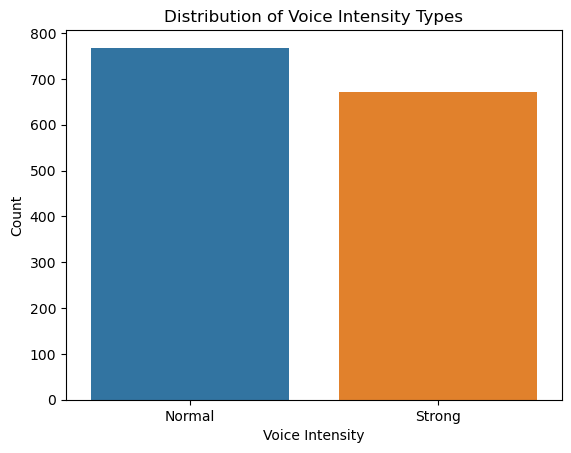

In [13]:
# Replace 1 and 2 with 'Normal' and 'Strong' in the 'voice_intensity' column
df['voice_intensity'] = df['voice_intensity'].replace({1: 'Normal', 2: 'Strong'})

# Create a count plot
sns.countplot(x='voice_intensity', data=df)

# Adding labels and title for clarity
plt.xlabel('Voice Intensity')
plt.ylabel('Count')
plt.title('Distribution of Voice Intensity Types')

# Display the plot
plt.show()

### Number of repeated phrases<a id='Number_of_repeated_phrases'></a>

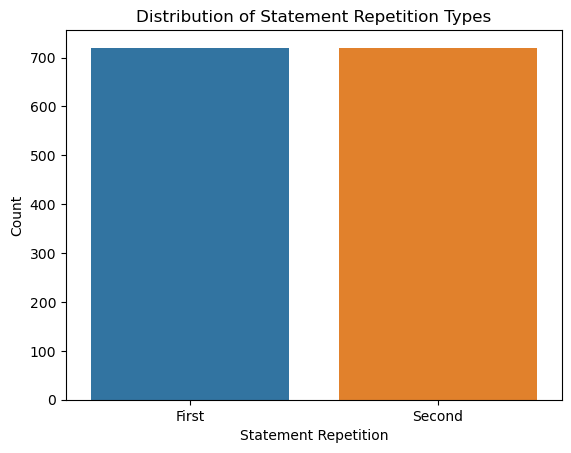

In [14]:
# Replace 1 and 2 with 'First' and 'Second' in the 'statement_repetition' column
df['statement_repetition'] = df['statement_repetition'].replace({1: 'First', 2: 'Second'})

# Create a count plot
sns.countplot(x='statement_repetition', data=df)

# Adding labels and title for clarity
plt.xlabel('Statement Repetition')
plt.ylabel('Count')
plt.title('Distribution of Statement Repetition Types')

# Display the plot
plt.show()


### Number of Male vs Female actors<a id='Number_of_Male_vs_Female_actors'></a>

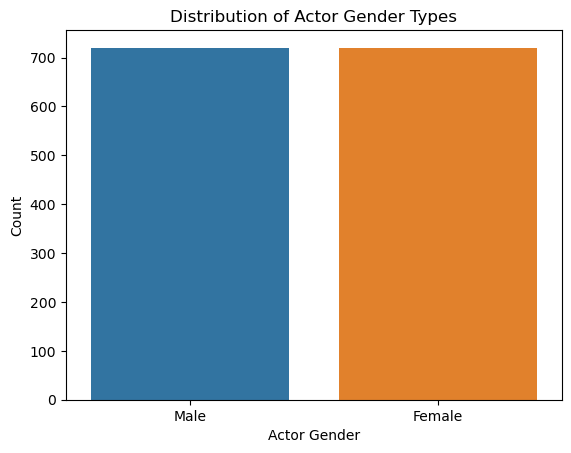

In [15]:
# Replace 1 and 2 with 'Male' and 'Female' in the 'actor_gender' column
df['actor_gender'] = df['actor_gender'].replace({1: 'Male', 2: 'Female'})

# Create a count plot
sns.countplot(x='actor_gender', data=df)

# Adding labels and title for clarity
plt.xlabel('Actor Gender')
plt.ylabel('Count')
plt.title('Distribution of Actor Gender Types')

# Display the plot
plt.show()

### Distributions Of Feature Values<a id='Distributions_Of_Feature_Values'></a>

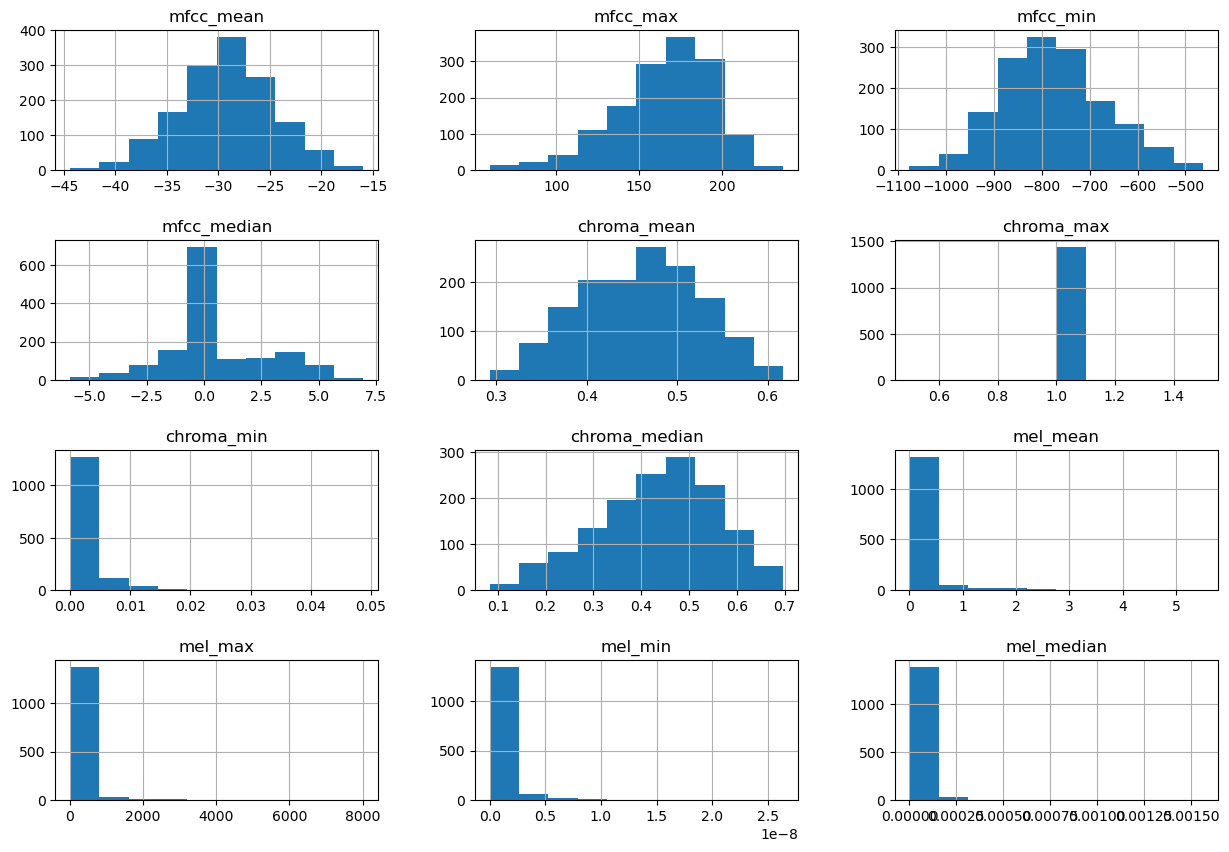

In [16]:
df.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5);

### Numeric data summary<a id='Numeric_data_summary'></a>

In [17]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mfcc_mean,1440.0,-2.925520e+01,4.602248e+00,-4.440279e+01,-3.226116e+01,-2.916206e+01,-2.616048e+01,-1.590798e+01
mfcc_max,1440.0,1.654126e+02,2.919576e+01,5.981857e+01,1.482173e+02,1.693475e+02,1.861655e+02,2.369786e+02
mfcc_min,1440.0,-7.761459e+02,1.057080e+02,-1.075813e+03,-8.504200e+02,-7.833204e+02,-7.099422e+02,-4.633587e+02
mfcc_median,1440.0,5.175871e-01,2.146273e+00,-5.852462e+00,-3.734228e-01,0.000000e+00,1.727758e+00,6.959915e+00
chroma_mean,1440.0,4.591852e-01,6.599456e-02,2.925846e-01,4.092206e-01,4.625562e-01,5.087059e-01,6.172521e-01
chroma_max,1440.0,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
chroma_min,1440.0,1.770628e-03,3.534314e-03,0.000000e+00,0.000000e+00,3.026221e-04,1.943276e-03,4.873185e-02
chroma_median,1440.0,4.347151e-01,1.231161e-01,8.318995e-02,3.510994e-01,4.474801e-01,5.258348e-01,6.970613e-01
mel_mean,1440.0,1.863525e-01,5.090412e-01,1.037747e-04,5.986146e-03,2.343138e-02,9.507482e-02,5.507250e+00
mel_max,1440.0,1.328960e+02,4.521728e+02,3.097882e-02,2.884299e+00,1.160190e+01,5.197589e+01,8.025073e+03


## Exporting DataFrame<a id='Exporting_DataFrame'></a>

In [18]:
# Exporting to CSV file
df.to_csv('voice_data.csv', index=False)

## Summary

The tests were successful and I was able to successfully import the files into a dataframe.  With a little examination 
of the features I was able to extract we can see an even number of male versus female actors. Same goes fort the repetition
of statements but the intensity was sqewed but that is understandable since the 'neutral' emotion does not have a 'strong'
intensity so there are less of them. I decided not to downsample the audio files upon further research. 16000 Hz seems to be 
the minimum standard for voice data and I'd prefer not to compromise the later model's ability to accurately predict 
emotions because of a reduction in quality. Next step is Exploratory Data Analysis and I'm excited to see what patterns arise.